
* hypothesis 1: W of grnboost is proportional to topological sorting of destination nodes
* true hypo: W of grnboost2 is ... to linear correlation of (i, j)

* true arg: lose fdr control because |Z_null(i, j)| are too large

* true hypo (need to test): |W_null(i, j)| <-> |Z_null(i, j)| = |W11_null(i, j)| - |W21_null(i, j)|
* true hypo: |W_null(i, j)| <-> corr(i, j)
* is corr(i, j) affected by any elements of X generation based on G_true? see below, I use necessary assumptions to make mean of x 0, and set w to constants. n is $|P_{src}(j)|$
$$ corr(i, j) = \frac{\prod_{(t, t+1) \in P(i, j)}w_{t, t+1} V(x_i) + \sum_{k \in P_{src}(j)} \prod_{(t, t+1) \in P(k, j)}w_{t, t+1} Cov(x_i, x_k)}{\sigma(x_i) \sigma(x_j)} $$
  * 
* analyze with distribution
* problem: unidentifiable G, too close to 0 W_true.



In [1]:
import re
import pandas as pd
import os
import pickle
import seaborn as sns
import numpy as np
import sys
sys.path.append("/Users/jiahang/Documents/dagma/src/dagma/")
import utils
import matplotlib.pyplot as plt
import scipy
import utils_dagma
from sklearn.metrics import auc, precision_recall_curve, roc_auc_score
from copy import deepcopy

In [137]:
path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v48/100_600/W_100_600_1_0_normX_sym1_grnboost2.pkl'
with open(path, 'rb') as f:
    W_grnboost2 = pickle.load(f)

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_option_5_PLS_normX_sym1_grnboost2/W/W_1_1_0.pkl'
with open(path, 'rb') as f:
    W_grn_knock = pickle.load(f)['W_est']

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_option_5_PLS_normX_sym1_grnboost2/knockoff/knockoff_1_1.pkl'
with open(path, 'rb') as f:
    X_knock = pickle.load(f)

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v39/100_600/W_100_600_1_0_normX_sym1.pkl'
with open(path, 'rb') as f:
    W_dagma = pickle.load(f)

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v11/v100_600_normX_sym1/'
with open(path + f'X/X_1.pkl', 'rb') as f:
    true_data = pickle.load(f)
X = true_data['X']
W_true = true_data['W_true']
W_true_bi = W_true + W_true.T
B_true = (W_true != 0)
B_true_T = B_true.T
B_true_bi = B_true | B_true_T
B_true_int = B_true.astype(int)
B_true_int_T = B_true_int.T
B_true_int_bi = B_true_bi.astype(int)
Z = np.abs(W_grn_knock[:100, :100]) - np.abs(W_grn_knock[100:, :100]) 
X_corr = np.abs(np.corrcoef(X, rowvar=False))
X_corr_remove_self = X_corr - np.diag(np.diag(X_corr))
X_corr_true_remove_self = deepcopy(X_corr_remove_self)
X_corr_true_remove_self[~B_true] = 0.
X_cov = np.cov(X, rowvar=False)
X_cov_remove_self = X_cov - np.diag(np.diag(X_cov))

<Axes: >

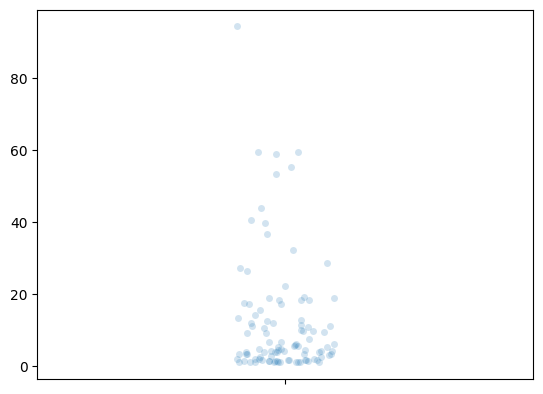

In [107]:
sns.stripplot(np.var(X, axis=0), alpha=0.2)

<Axes: >

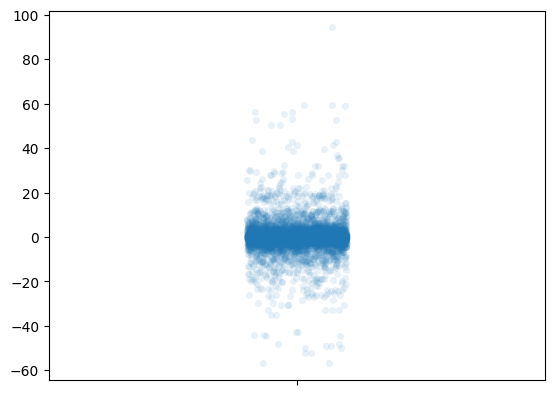

In [97]:
sns.stripplot(np.cov(X, rowvar=False).flatten(), alpha=0.1)

<Axes: >

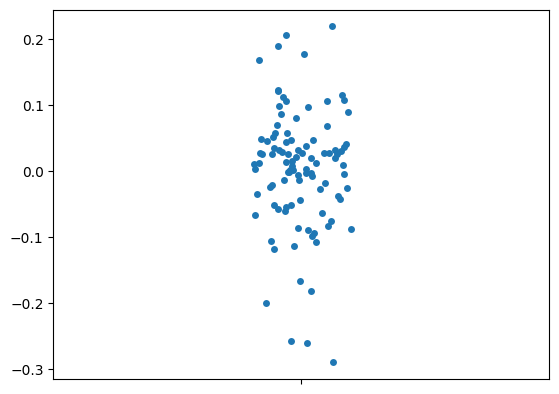

In [92]:
sns.stripplot(X.mean(0))

<Axes: xlabel='corr', ylabel='W'>

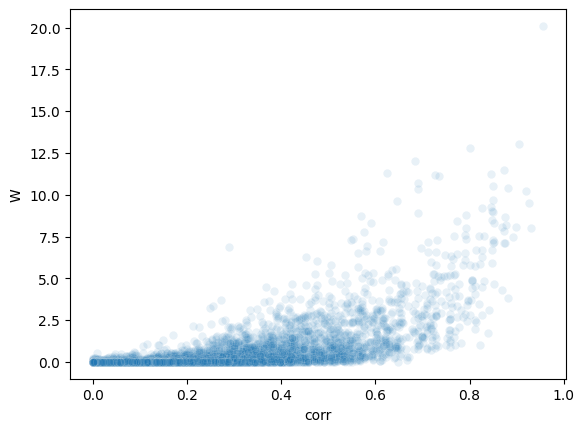

In [111]:
fig, axs = plt.subplots((1, 2), figsize=(12, 5))

ax = axs[0]
data = {
    'corr': X_corr_remove_self[~B_true].flatten(), 
    '|W|': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='|W|',
    alpha=0.1, ax=ax
)
ax.set_title("GRNBoost2")

ax = axs[0]
data = {
    'corr': X_corr_remove_self[~B_true].flatten(), 
    '|W|': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='|W|',
    alpha=0.1, ax=ax
)
ax.set_title("GRNBoost2")

Text(0.5, 0.98, '|W| vs |covariance| of null edges | 100 * 600 | seed_X = 1')

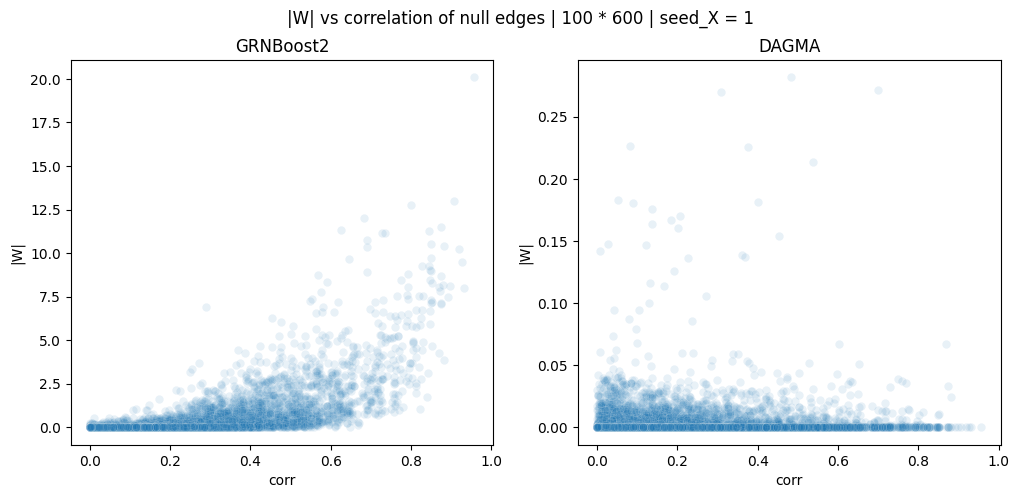

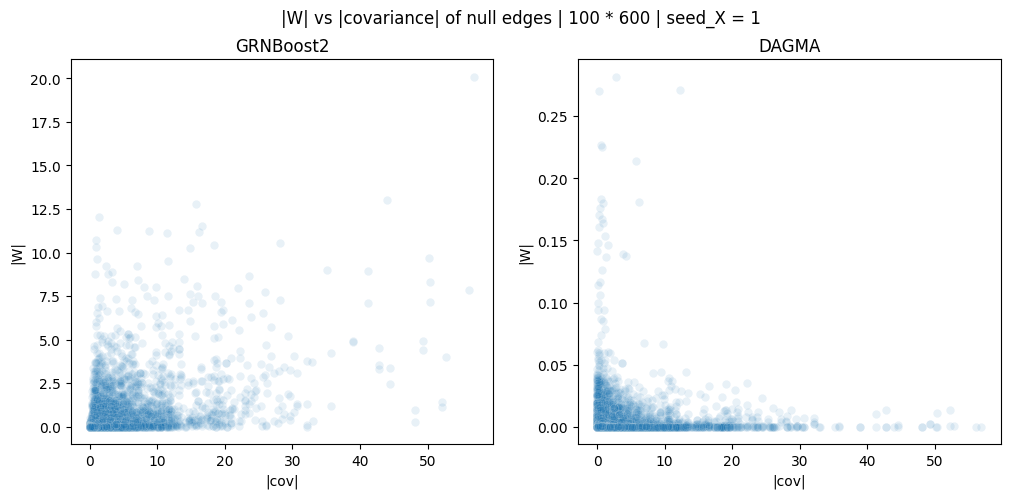

In [277]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ax = axs[0]
data = {
    'corr': X_corr_remove_self[~B_true].flatten(), 
    '|W|': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='|W|',
    alpha=0.1, ax=ax
)
ax.set_title("GRNBoost2")

ax = axs[1]
data = {
    'corr': X_corr_remove_self[~B_true].flatten(), 
    '|W|': np.abs(W_dagma[~B_true].flatten())
}
sns.scatterplot(
    data, x='corr', y='|W|',
    alpha=0.1, ax=ax
)
ax.set_title("DAGMA")
plt.suptitle("|W| vs correlation of null edges | 100 * 600 | seed_X = 1")

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ax = axs[0]
data = {
    '|cov|': np.abs(X_cov_remove_self[~B_true]).flatten(), 
    '|W|': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='|cov|', y='|W|',
    alpha=0.1, ax=ax
)
ax.set_title("GRNBoost2")

ax = axs[1]
data = {
    '|cov|': np.abs(X_cov_remove_self)[~B_true].flatten(), 
    '|W|': np.abs(W_dagma[~B_true].flatten())
}
sns.scatterplot(
    data, x='|cov|', y='|W|',
    alpha=0.1, ax=ax
)
ax.set_title("DAGMA")
plt.suptitle("|W| vs |covariance| of null edges | 100 * 600 | seed_X = 1")
# plt.tight_layout()

<Axes: xlabel='corr', ylabel='W'>

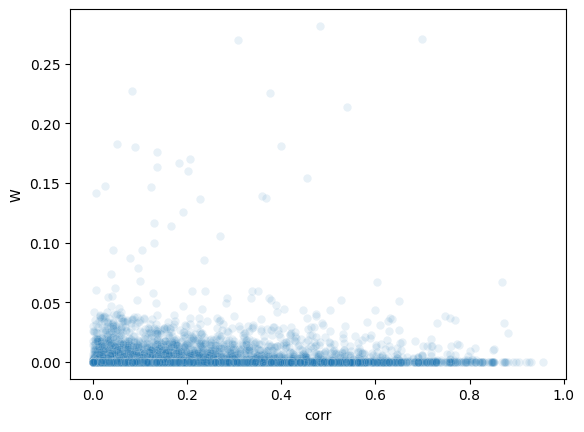

In [72]:
data = {
    'corr': X_corr_remove_self[~B_true].flatten(), 
    'W': np.abs(W_dagma)[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='cov', ylabel='W'>

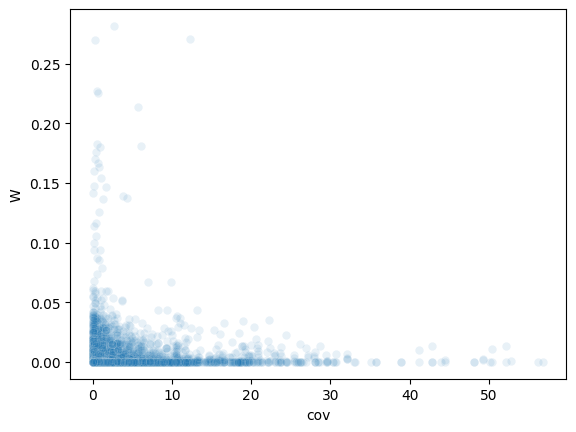

In [249]:
data = {
    'cov': np.abs(X_cov_remove_self[~B_true].flatten()), 
    'W': np.abs(W_dagma)[~B_true].flatten()
}
sns.scatterplot(
    data, x='cov', y='W',
    alpha=0.1
)

# focus on 2rd order null edge

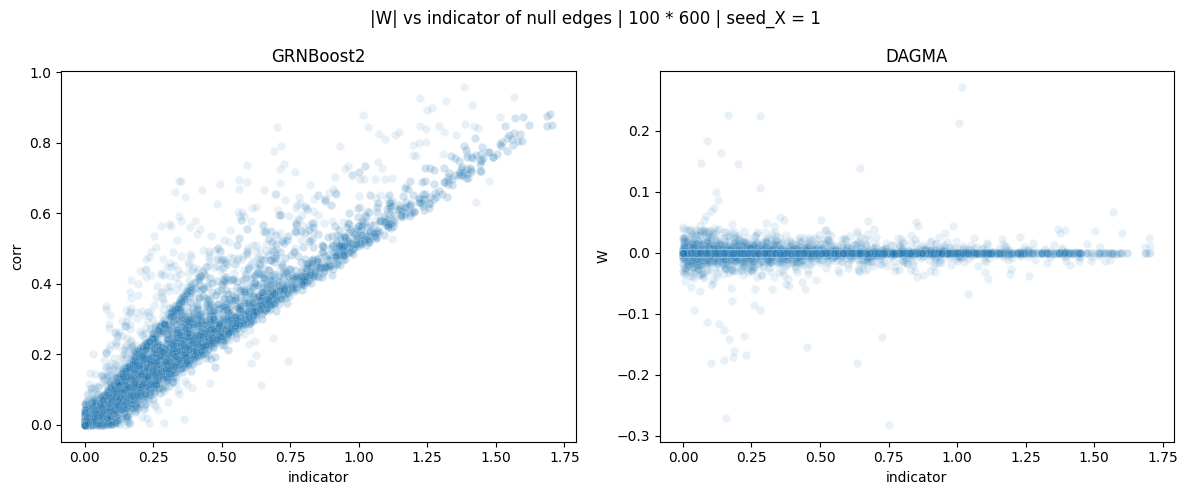

In [274]:
var = np.var(X, axis=0, keepdims=True)
order = 3
B_null_ord = (~B_true) & (np.linalg.matrix_power(B_true, order)).astype(bool)
cov_all_noise = np.zeros((100, 100))
var_all_noise = np.zeros((100, 100))
var_all_signal = np.zeros((100, 100))
for i in range(100):
    W_true_no_i = deepcopy(W_true)
    W_true_no_i[:, i] = 0.
    W_true_no_i[i, :] = 0.
    W_true_no_i_prd = 0.
    for _ord in range(1, order):
        W_true_no_i_prd += np.linalg.matrix_power(W_true_no_i, _ord)
    cov_i = X_cov_remove_self[i, :].reshape(1, -1)
    cov_i = cov_i @ W_true_no_i_prd
    cov_all_noise[i, :] = cov_i.flatten() 
    # var_i(j) (i-row j-col of var_all) represents contributions of variances of all nodes other than i to j of only 2-ord path

    W_true_pow_prd = 0.
    for _ord in range(1, order):
        W_true_pow_prd += np.linalg.matrix_power(W_true, _ord)
    var_only_i = np.zeros((1, 100))
    var_only_i[0, i] = var[0, i]
    var_only_i = var_only_i @ W_true_pow_prd
    var_all_signal[i, :] = var_only_i.flatten()
    
    # var_i(j) (i-row j-col of var_all) represents contributions of variances of only i to j of only 2-ord path

indicator = np.abs((var_all_signal + cov_all_noise) / np.sqrt(var.T @ var))
indicator = (indicator + indicator.T) / 2
data = {
    'indicator': indicator[~B_true].flatten(),
    'corr': X_corr_remove_self[~B_true].flatten()
}
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ax = axs[0]
sns.scatterplot(
    data, x='indicator', y='corr',
    alpha=0.1, ax=ax
)
ax.set_title("GRNBoost2")

ax=axs[1]
data = {
    'indicator': indicator[~B_true].flatten(), 
    'W': W_dagma[~B_true].flatten()
}
sns.scatterplot(
    data, x='indicator', y='W',
    alpha=0.1, ax=ax
)

ax.set_title("DAGMA")

plt.suptitle("|W| vs indicator of null edges | 100 * 600 | seed_X = 1")
plt.tight_layout()

<Axes: xlabel='indicator', ylabel='W'>

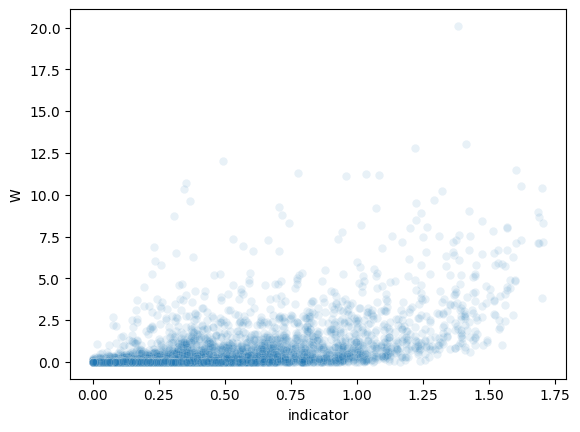

In [237]:
data = {
    'indicator': indicator[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='indicator', y='W',
    alpha=0.1
)

<Axes: xlabel='indicator', ylabel='W'>

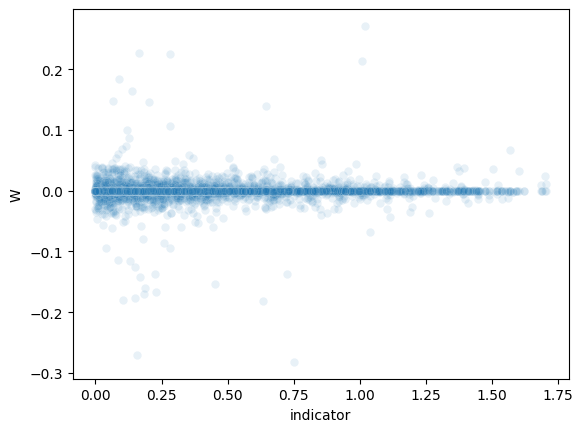

In [270]:
indicator1 = np.abs((var_all_signal + cov_all_noise))
data = {
    'indicator': indicator[~B_true].flatten(), 
    'W': W_dagma[~B_true].flatten()
}
sns.scatterplot(
    data, x='indicator', y='W',
    alpha=0.1
)

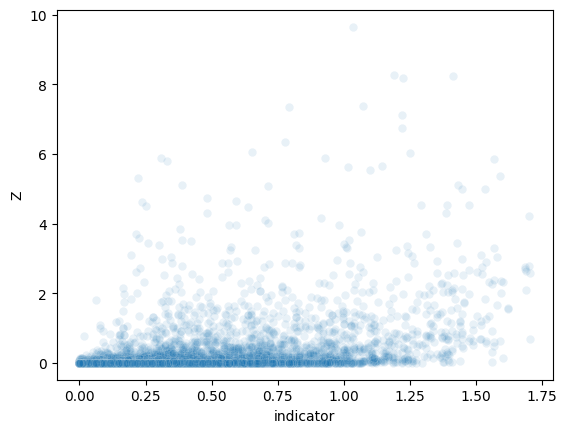

In [246]:
data = {
    'indicator': indicator[~B_true].flatten(), 
    'Z': np.abs(Z[~B_true].flatten())
}
ax = sns.scatterplot(
    data, x='indicator', y='Z',
    alpha=0.1
)
# ax.set_ylim([-np.abs(Z[~B_true]).max(), np.abs(Z[~B_true]).max()])

<Axes: >

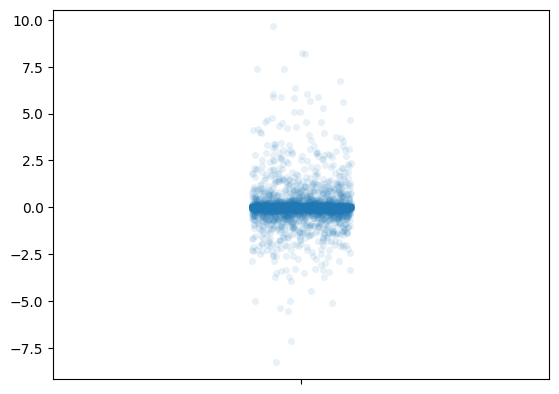

In [240]:
sns.stripplot(Z[~B_true].flatten(), alpha=0.1)

In [197]:
np.where((indicator == 0) & (W_grnboost2 >= 8) & (~B_true))

(array([23, 63, 89, 94]), array([85, 91, 70, 21]))

In [198]:
var_all_signal[23, 85]

0.0

In [201]:
cov_all_noise[23, 85]

0.0

In [203]:
X_corr[23, 85]

0.6910826727886303

In [41]:
W_true_1 @ W_true_1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30956022,  0.        ,  0.        , ..., -0.03892994,
         0.05017839,  0.23677975],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00080864,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [44]:
var_0 @ W_true_0 @ W_true_0

array([[ 0.00000000e+00, -3.52438020e+00,  0.00000000e+00,
         2.36788739e+00, -1.97160638e+00, -3.88221938e-01,
         0.00000000e+00,  0.00000000e+00,  2.41783381e+00,
         9.70611618e+00,  0.00000000e+00,  1.22771429e+01,
         7.49996319e-02, -1.94822754e-01,  4.29479891e+00,
        -3.04309392e-01, -2.49554480e+00,  4.84600642e-02,
         4.44581804e+00, -2.56550113e+00,  0.00000000e+00,
         0.00000000e+00,  3.74211946e-01,  0.00000000e+00,
        -2.82333749e-02, -2.07782410e+00,  1.93580187e+01,
        -3.58364417e+00, -1.26881036e+00,  5.64075707e+00,
        -2.25750884e-02, -1.50464706e+00,  0.00000000e+00,
        -4.06367978e+00, -1.63539307e-02,  2.06461039e+01,
         0.00000000e+00,  1.04410874e+00, -2.89635069e+00,
         3.23880435e-01, -2.33369657e-01,  1.05488979e-01,
        -2.58068097e+00,  0.00000000e+00, -8.38444994e+00,
         0.00000000e+00, -1.28005462e+01,  1.95128958e+00,
         5.58258389e-01,  2.06149210e-01, -4.34295496e+0

In [45]:
var_1 @ W_true_1 @ W_true_1

array([[ 3.20872767e+00,  0.00000000e+00,  0.00000000e+00,
         2.36788739e+00, -1.97160638e+00, -3.88221938e-01,
         0.00000000e+00,  0.00000000e+00,  2.41783381e+00,
         9.70611618e+00,  0.00000000e+00,  1.22771429e+01,
         7.49996319e-02, -1.94822754e-01,  4.29479891e+00,
        -3.04309392e-01, -2.49554480e+00,  4.84600642e-02,
         4.44581804e+00, -2.56550113e+00,  0.00000000e+00,
         0.00000000e+00,  3.74211946e-01,  0.00000000e+00,
        -2.82333749e-02, -2.07782410e+00,  1.93580187e+01,
        -3.58364417e+00, -1.26881036e+00,  5.64075707e+00,
        -2.25750884e-02, -1.50464706e+00,  0.00000000e+00,
        -4.06367978e+00, -1.63539307e-02,  2.06461039e+01,
         0.00000000e+00,  1.04410874e+00, -2.89635069e+00,
         3.23880435e-01, -2.33369657e-01,  1.05488979e-01,
        -2.58068097e+00,  0.00000000e+00, -8.38444994e+00,
         0.00000000e+00, -1.28005462e+01,  1.95128958e+00,
         5.58258389e-01,  2.06149210e-01, -4.34295496e+0

<Axes: xlabel='corr', ylabel='W'>

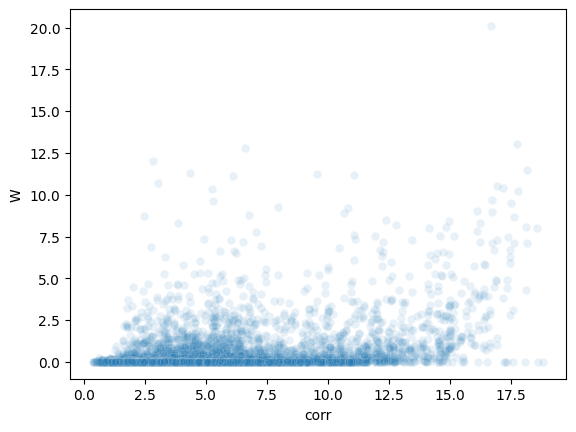

In [26]:
data = {
    'corr': (X_corr @ X_corr)[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='corr', ylabel='W'>

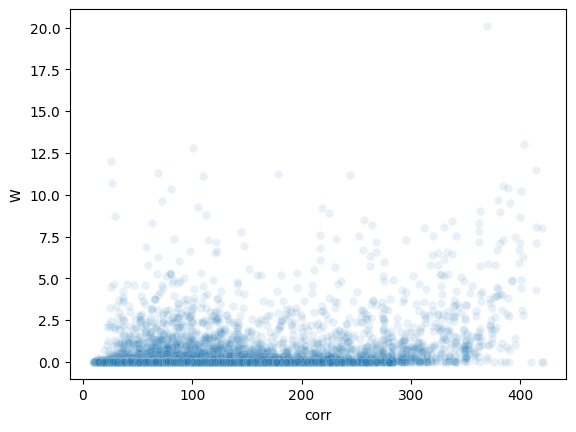

In [27]:
data = {
    'corr': (X_corr @ X_corr @ X_corr)[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='corr', ylabel='W'>

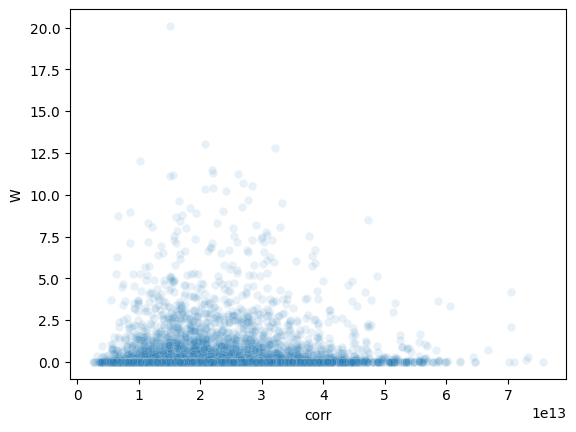

In [89]:
W_true_prod = 0
for i in range(2, 20, 1):
    W_true_prod += np.linalg.matrix_power(np.abs(W_true_bi), i)
data = {
    'corr': W_true_prod[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='corr', ylabel='W'>

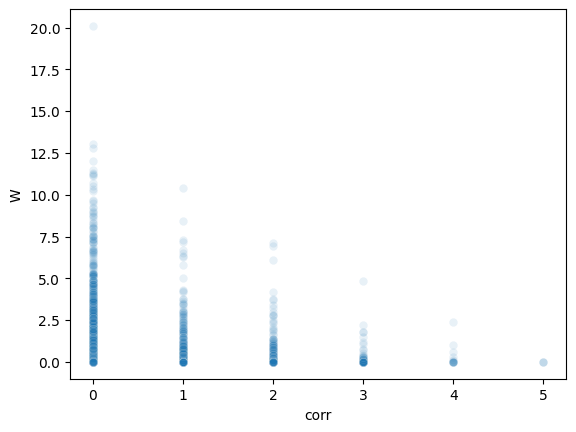

In [8]:
B_true_prod = 0
for i in range(2, 3, 1):
    B_true_prod += np.linalg.matrix_power(B_true_int, i)
data = {
    'corr': B_true_prod[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='corr', ylabel='W'>

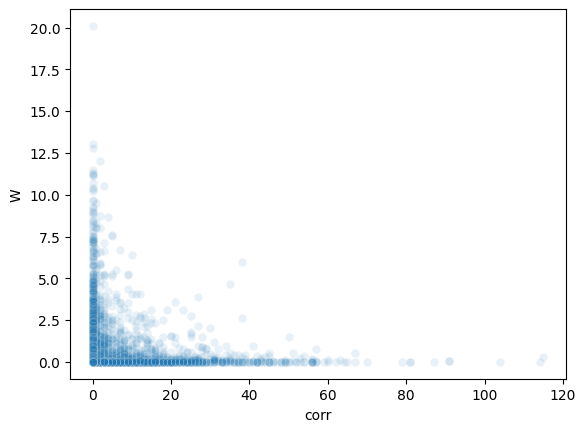

In [23]:
B_true_prod = 0
for i in range(2, 5, 1):
    B_true_prod += np.linalg.matrix_power(B_true_int_T, i)
data = {
    'corr': B_true_prod[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='corr', ylabel='W'>

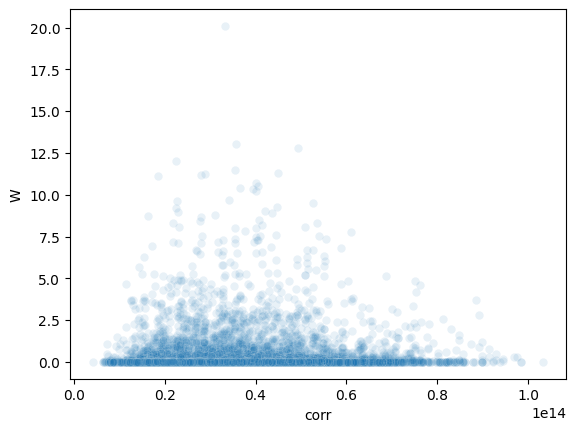

In [39]:
B_true_prod = 0
for i in range(2, 15, 1):
    B_true_prod += np.linalg.matrix_power(B_true_int_bi, i)
data = {
    'corr': B_true_prod[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='corr', ylabel='W'>

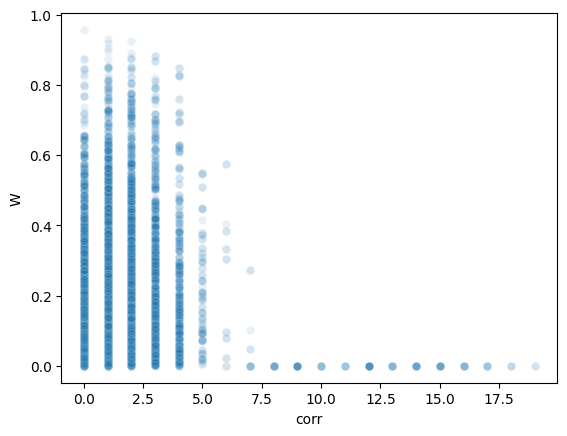

In [53]:
B_true_prod = 0
for i in range(2, 3, 1):
    B_true_prod += np.linalg.matrix_power(B_true_int_bi, i)
data = {
    'corr': B_true_prod[~B_true].flatten(), 
    'W': X_corr_remove_self[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='corr', ylabel='W'>

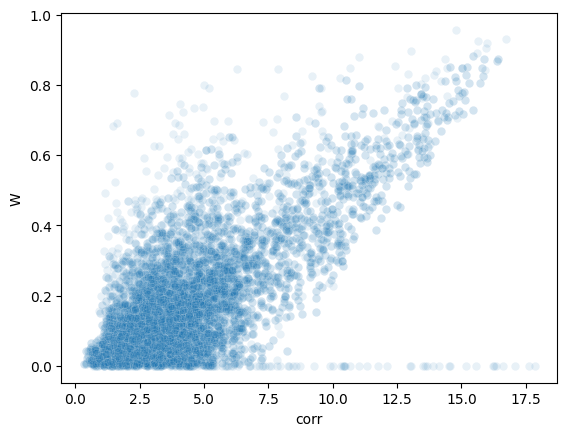

In [61]:
X_corr_remove_self_prod = 0
for i in range(2, 3, 1):
    X_corr_remove_self_prod += np.linalg.matrix_power(X_corr_remove_self, i)
data = {
    'corr': X_corr_remove_self_prod[~B_true].flatten(), 
    'W': X_corr_remove_self[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='corr', ylabel='W'>

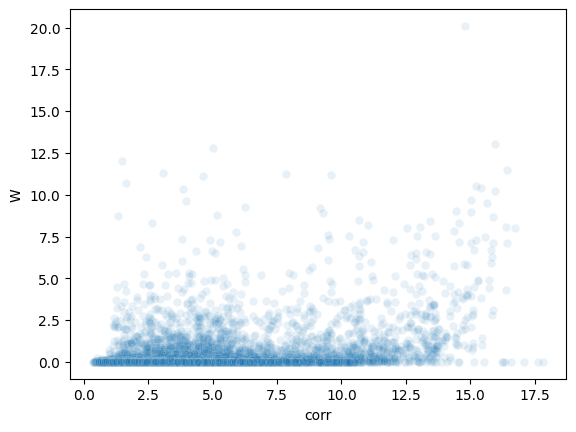

In [70]:
X_corr_remove_self_prod = 0
for i in range(2, 3, 1):
    X_corr_remove_self_prod += np.linalg.matrix_power(X_corr_remove_self, i)
data = {
    'corr': X_corr_remove_self_prod[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='corr', ylabel='W'>

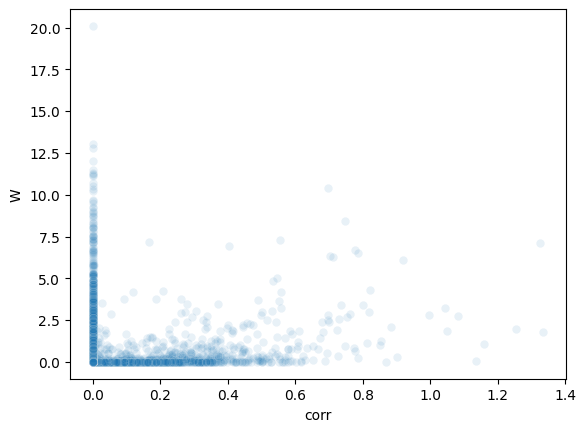

In [75]:
X_corr_remove_self_prod = 0
for i in range(2, 3, 1):
    X_corr_remove_self_prod += np.linalg.matrix_power(X_corr_true_remove_self, i)
data = {
    'corr': X_corr_remove_self_prod[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

<Axes: xlabel='corr', ylabel='W'>

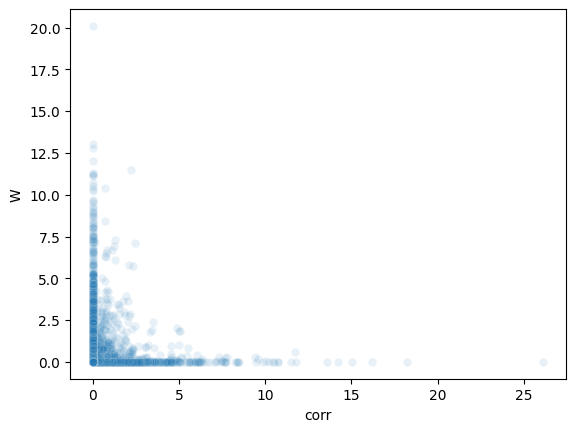

In [74]:
X_corr_remove_self_prod = 0
for i in range(2, 20, 1):
    X_corr_remove_self_prod += np.linalg.matrix_power(X_corr_true_remove_self, i)
data = {
    'corr': X_corr_remove_self_prod[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)

In [78]:
a = X_corr_true_remove_self + X_corr_true_remove_self.T

<Axes: xlabel='corr', ylabel='W'>

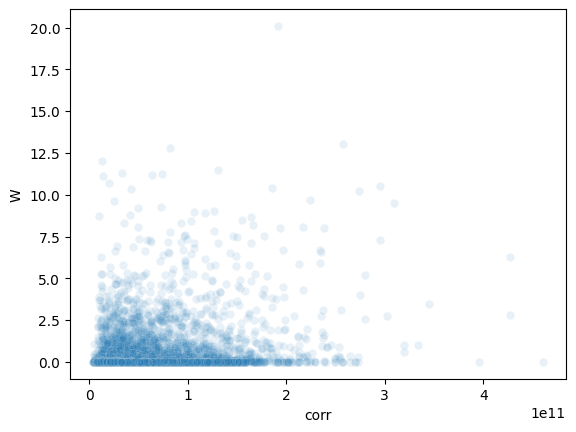

In [81]:
X_corr_remove_self_prod = 0
for i in range(2, 20, 1):
    X_corr_remove_self_prod += np.linalg.matrix_power(a, i)
data = {
    'corr': X_corr_remove_self_prod[~B_true].flatten(), 
    'W': W_grnboost2[~B_true].flatten()
}
sns.scatterplot(
    data, x='corr', y='W',
    alpha=0.1
)